In [1]:
import matplotlib.pyplot as plt
import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np
from PIL import Image
from scipy import misc, ndimage 
from tensorflow import keras 
from tensorflow.keras import backend as K 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import imageio
from PIL import Image
import PIL.ImageOps  
import imgaug.augmenters as iaa
import imgaug as imgaug

%matplotlib inline


In [4]:
# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
def myFunc(image):
    image = np.expand_dims(image, 0)
    seq = iaa.Sequential([
        iaa.ChannelShuffle(np.random.random(1)[0])
    ])
    image = seq(images=image)
    return image

gen = ImageDataGenerator(
	rotation_range=90,
	zoom_range=[0.3, 2],
	fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function = myFunc

)


In [73]:
imgPath = 'Bird.jpg'
image = np.expand_dims(imageio.imread(imgPath), 0)
alt_iter = gen.flow(image)
aug = []
for _, i in enumerate(range(10)):
    aug_image = next(alt_iter)[0]
    aug.append(aug_image)


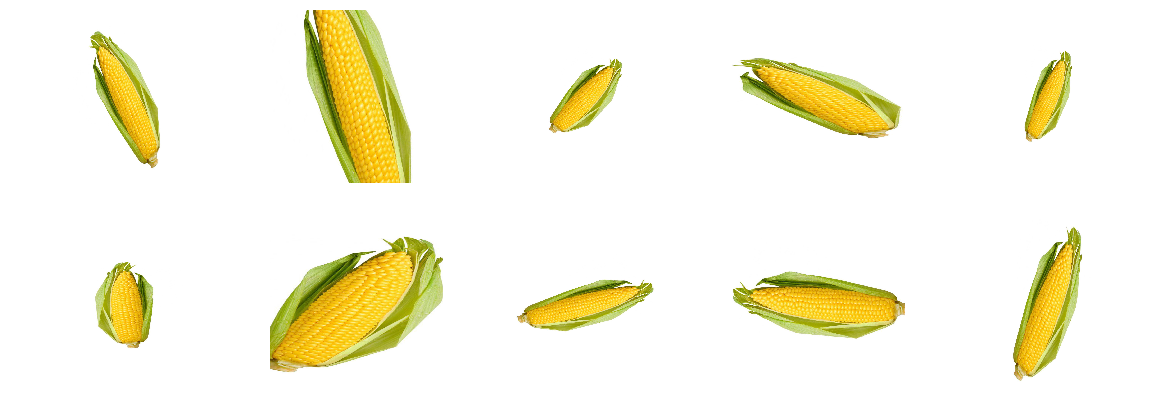

In [74]:
plots(aug, figsize=(20,7), rows=2)